In [91]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")


In [92]:
# Data Generate X,Y
def generateDataset(m):
  X=np.random.randn(m)*10   #  it will give normal distribution between -10 to 10
  noise = np.random.randn(m)
  # print(X)
  # print(X.mean(),X.std())
  y=(3*X+1) + 5*noise
  return X,y

X,y=generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


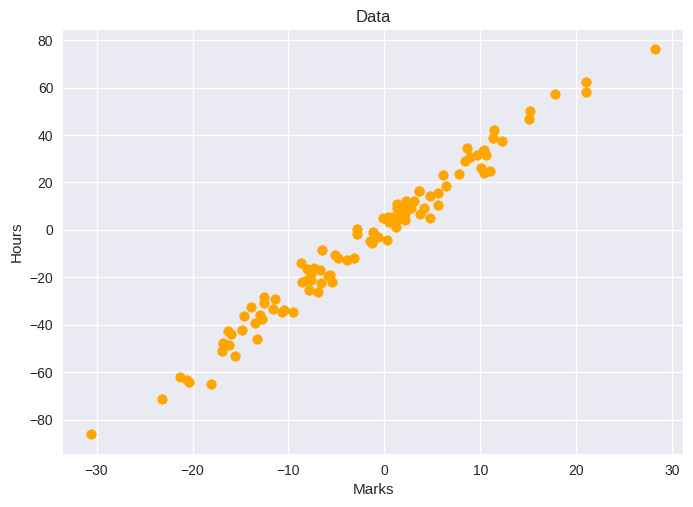

In [93]:
def plotData(X,y,color="orange",title="Data"):
  plt.title(title)
  plt.xlabel("Marks")
  plt.ylabel("Hours")
  plt.scatter(X,y,c=color)
  plt.show()

plotData(X,y)


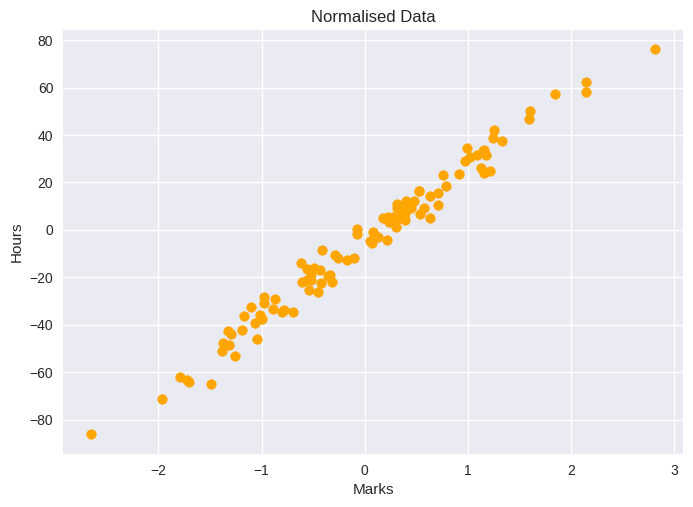

In [94]:
def normaliseData(X):
  X=(X-X.mean())/X.std()
  return X

X=normaliseData(X)
plotData(X,y,title="Normalised Data")
# print(X.mean(),X.std())

In [95]:
# Train and Split
def trainTestSplit(X,y,split=0.8):
  m=X.shape[0]
  data = np.zeros((m,2))
  data[:,0]=X
  data[:,1]=y
  np.random.shuffle(data)
  split=int(m*split)
  XT = data[:split,0]
  yT = data[:split,1]
  Xt = data[split:,0]
  ytest = data[split:,1]
  return XT,yT,Xt,ytest

XT,yT,Xt,ytest=trainTestSplit(X,y)
print(XT.shape,yT.shape,Xt.shape,ytest.shape)


(80,) (80,) (20,) (20,)


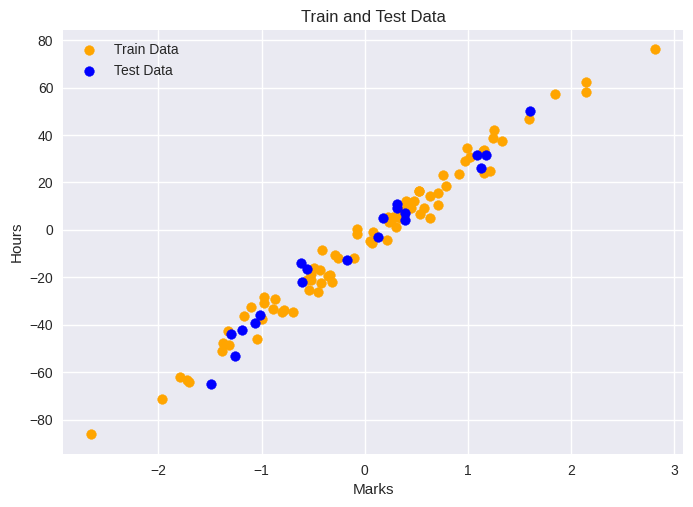

In [96]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,ytest,color='blue',label="Test Data")
plt.legend()
plt.title("Train and Test Data")
plt.xlabel("Marks")
plt.ylabel("Hours")
plt.show()

In [97]:
#  Hypothesis Function
def hypothesis(X,theta):
  # print(X.shape,theta.shape)

  return theta[0] + theta[1]*X

def error(X,y,theta):
  m =X.shape[0]
  e=0
  for i in range(m):
    e+=(hypothesis(X[i],theta)-y[i])**2
  return e/(2*m)
def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))
  for i in range(m):
    grad[0] += (hypothesis(X[i],theta)-y[i])
    grad[1] += (hypothesis(X[i],theta)-y[i])*X[i]
    grad[0] /=m
  grad[1] /=m
  return grad

def train(X,y,learning_rate =0.1):
 theta = np.zeros((2,))
 maxItrs = 100
 error_list =[]
 for i in range(maxItrs):
  grad = gradient(X,y,theta)
  error_list.append(error(X,y,theta))
  theta[0] = theta[0] - learning_rate*grad[0]
  theta[1] = theta[1] -learning_rate*grad[1]
 plt.xlabel("iteration Number")
 plt.ylabel("Error")
 plt.plot(error_list)
 return theta


array([-0.64575624, 31.77459943])

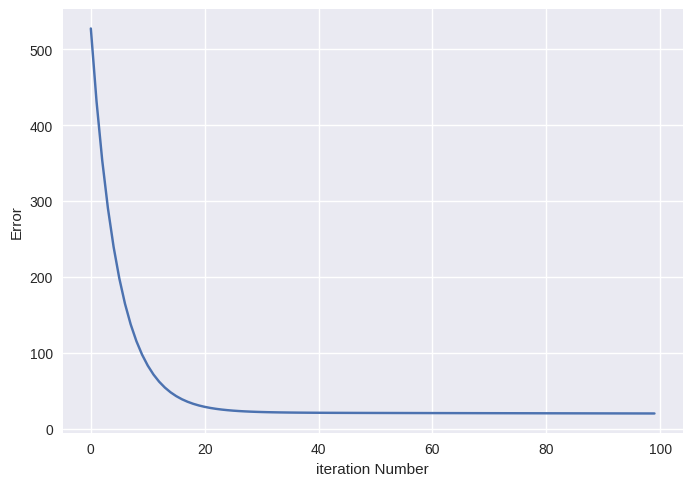

In [98]:
theta = train(X,y)
theta

In [99]:
def predict(X,theta):
  return hypothesis(X,theta)



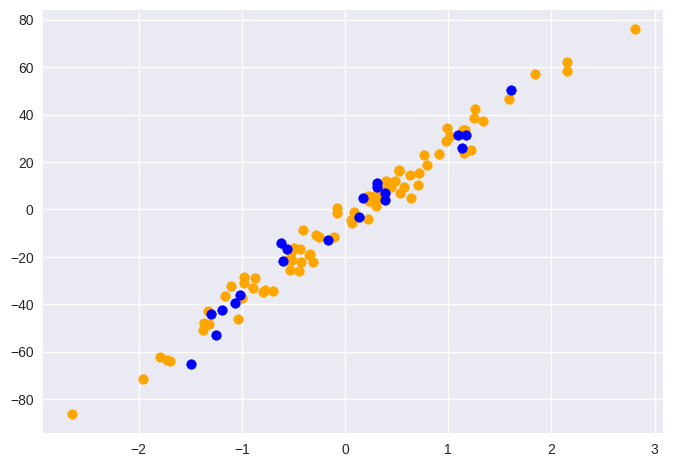

In [100]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,ytest,color='blue',label="Test Data")
plt.show()

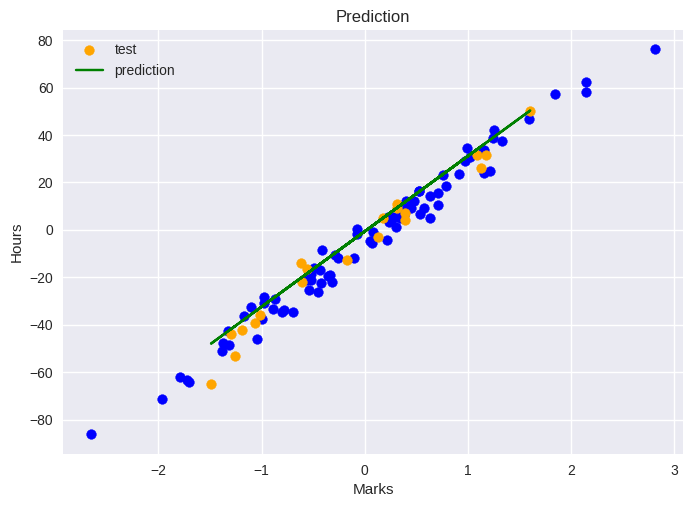

In [105]:
yp =predict(Xt,theta)
# Xt.shape
plt.scatter(XT,yT,color='blue',)
plt.scatter(Xt,ytest,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.title("Prediction")
plt.xlabel("Marks")
plt.ylabel("Hours")
plt.show()

In [106]:
# Model Evaluation
def r2Score(y,yp):
  num = np.sum((y-yp)**2)
  den = np.sum((y-y.mean())**2)
  return 1-(num/den)

In [109]:
r2Score(ytest,yp)

np.float64(0.9554110184514587)

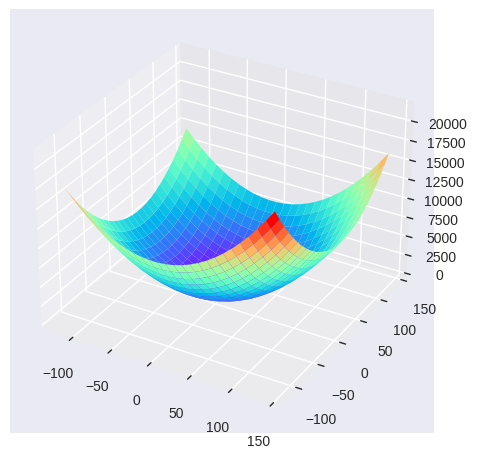

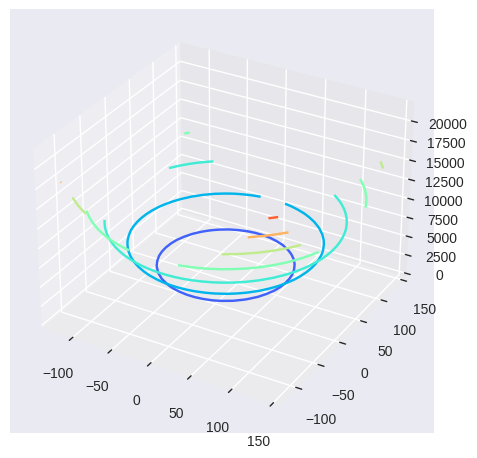

In [114]:
# Visualising the training process
import mpl_toolkits.mplot3d # Import for 3D plotting
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
  for j in range(J.shape[1]):
    yp = T1[i, j]*X + T0[i, j]
    J[i,j]=np.mean((y-yp) ** 2)/2

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d') # Modified from gca to add_subplot
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d') # Modified from gca to add_subplot
axes.contour(T0,T1,J,cmap='rainbow' )
plt.show()